In [127]:
import pymongo
import pandas as pd
client = pymongo.MongoClient()
db = client["house"]
cursor = db.house.find()
df = pd.DataFrame(list(cursor))
df = df.drop_duplicates(["title", "price",
                    "xiaoqu_name", "size",
                    "buildyear", "huxing",
                    "chaoxiang", "zhuangxiu",
                    "cenggao", "district_name",
                    "sub_district_name"])

In [91]:
df.head(3)

,_id,title,price,up_price,xiaoqu_name,size,buildyear,huxing,chaoxiang,zhuangxiu,cenggao,louxing,district_name,sub_district_name
0,5dcbb62694ae6f30ad4f8d99,三房+诚意出售+全明户型+看房方便+钥匙房,420.0,46497.0,培花久远公寓,90.33,1997,3室1厅,南,简装,高楼层(共6层),板楼,浦东,北蔡
1,5dcbb62694ae6f30ad4f8d9a,10+婚房新装修+无增值税+无个税+诚意出售看房方便！！,208.0,45565.0,芳雅苑,45.65,1995,1室1厅,南,精装,高楼层(共7层),板楼,浦东,北蔡
2,5dcbb62694ae6f30ad4f8d9b,新上电梯两房，无增值税，自住装修，看房方便，诚售,460.0,60671.0,大华锦绣华城(二街区),75.82,2012,2室1厅,南 北,精装,低楼层(共18层),板楼,浦东,北蔡


In [108]:
import numpy as np
df_avg = df.groupby("district_name")["up_price"].agg({"avg_price": "mean"}).sort_values(by="avg_price")

C:\Users\linushen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


In [93]:
import seaborn as sns
%matplotlib inline
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\STXIHEI.TTF',size=14)
sns.set(font=myfont.get_name())


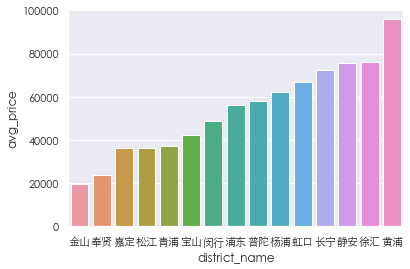

In [94]:
sns.barplot(x=df_avg.index, y="avg_price", data=df_avg)

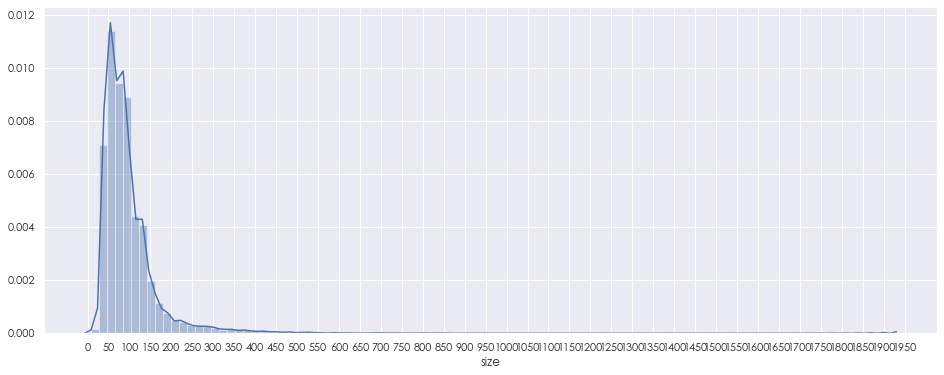

In [105]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_xticks(range(0, 2000, 50))
sns.distplot(df["size"], hist=True, bins=100, ax=ax1)

In [115]:
df_district = df.groupby("district_name")["price"].agg({"house_num": "count"}).sort_values(by="house_num")

C:\Users\linushen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


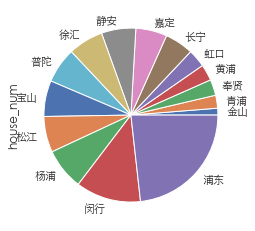

In [116]:
df_district.plot.pie(y="house_num", legend=False)

In [138]:
df_zhuangxiu = df[df.zhuangxiu!=""].groupby("zhuangxiu")["price"].agg({"house_num": "count"}).sort_values(by="house_num")

C:\Users\linushen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [139]:
df_zhuangxiu

,house_num
zhuangxiu,
毛坯,5299
其他,5619
简装,22597
精装,32266


C:\Users\linushen\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


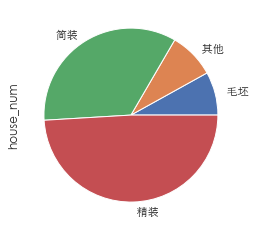

In [140]:
df_zhuangxiu[df_zhuangxiu!=""].plot.pie(y="house_num", legend=False)

In [144]:
df_buildyear = df[df.buildyear>0].groupby("buildyear")["buildyear"].agg({"house_num": "count"}).sort_values(by="buildyear")

C:\Users\linushen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


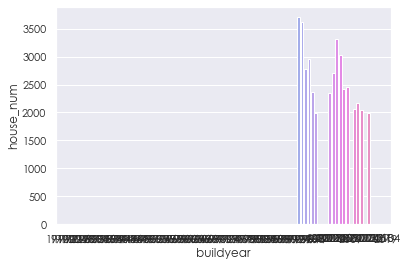

In [148]:
df_buildyear = df_buildyear[df_buildyear.index>1950]
sns.barplot(x=df_buildyear.index, y="house_num", data=df_buildyear)

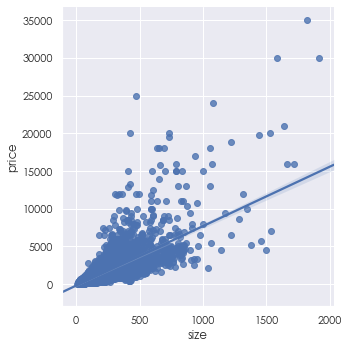

In [117]:
sns.lmplot(x="size", y="price", data=df)

In [121]:
df_xiaoqu = df.groupby("xiaoqu_name")["price"].agg({"house_num": "count"}).sort_values(by="house_num")

C:\Users\linushen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [128]:
df2 = df[df.xiaoqu_name=="上海康城 "]

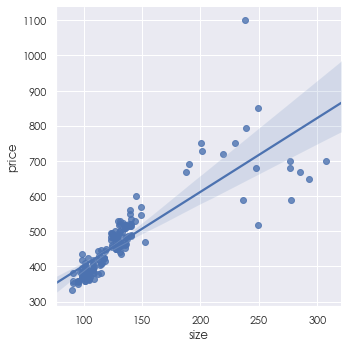

In [129]:
sns.lmplot(x="size", y="price", data=df2)